# Практическое задание №4 (vo-HW)
Итоговый проект по дисциплине "Автоматизация администрирования MLOps II".<br>
  Выполнила студентка Антропова Н.Г.

---

**Классификатор эмоций на основе сигналов мозговой ЭЭГ <br>**




О проекте:<br>
В этом проекте реализуется процесс машинного обучения с использованием Airflow для автоматизации и MLflow для отслеживания экспериментов. Цель проекта — сравнить эффективность трех разных алгоритмов классификации: логистической регрессии, метода опорных векторов (SVM) и случайного леса, для решения задачи классификации эмоций на основе данных ЭЭГ.

Процесс Автоматизации:

    Скачивание данных: Автоматическое извлечение актуальных данных, гарантирующее начальную точность и целостность данных.
    Предобработка данных: Стандартизация и кодирование данных для подготовки к моделированию.
    Разделение на выборки: Разбиение данных на тренировочный и тестовый наборы для последующего обучения и валидации.
    Моделирование: Обучение трех различных моделей машинного обучения и оценка их производительности.
    Логирование и сравнение: Систематическое сравнение результатов с использованием MLflow для отслеживания метрик и настроек модели.

Отслеживаемые Метрики:

    F1-счет (F1-score): Гармоническое среднее точности и полноты.
    Точность (Precision): Доля истинно положительных результатов среди всех положительных результатов, предсказанных моделью.
    Полнота (Recall): Доля истинно положительных результатов среди всех реальных положительных случаев.
    Поддержка (Support): Количество реальных вхождений каждого класса в указанных данных.
    Макро-усредненные метрики: Среднее значение метрик, взвешенное по классам, предоставляющее общую оценку производительности модели по всем классам.

Выбор Моделей:

    Логистическая регрессия: Простая и прозрачная модель, служит базовым уровнем для сравнения.
    Метод опорных векторов (SVM): Хорошо работает с большим количеством признаков и может эффективно обрабатывать нелинейные отношения благодаря использованию различных ядер.
    Случайный лес: Ансамблевая модель с высокой точностью и устойчивостью к переобучению, особенно эффективная в сложных задачах классификации.

О данных:<br>
Данные были собраны от двух человек (1 мужчина, 1 женщина) в течение 3 минут в каждом состоянии - положительном, нейтральном, отрицательном. Использовалась головная повязка ЭЭГ Muse, которая записывала данные с электродов в точках TP9, AF7, AF8 и TP10. Было записано шесть минут данных в состоянии покоя (нейтральном), а также в состояниях, вызванных отрицательными и положительными стимулами (просмотр видеороликов):

    "Марли и Я" - Отрицательные эмоции (Twentieth Century Fox)
    Сцена смерти

    "Вверх" - Отрицательные эмоции (Walt Disney Pictures)
    Начальная сцена со смертью

    "Моя девочка" - Отрицательные эмоции (Imagine Entertainment)
    Сцена похорон

    "Ла-Ла Ленд" - Положительные эмоции (Summit Entertainment)
    Начальный музыкальный номер

    "Медленная жизнь" - Положительные эмоции (BioQuest Studios)
    Таймлапс природы

    "Смешные собаки" - Положительные эмоции (MashupZone)
    Смешные видео с собаками


Авторы данных и их исследования:<br>

J. J. Bird, L. J. Manso, E. P. Ribiero, A. Ekart, and D. R. Faria, “A study on mental state classification using eeg-based brain-machine interface,”in 9th International Conference on Intelligent Systems, IEEE, 2018.

J. J. Bird, A. Ekart, C. D. Buckingham, and D. R. Faria, “Mental emotional sentiment classification with an eeg-based brain-machine interface,” in The International Conference on Digital Image and Signal Processing (DISP’19), Springer, 2019.

In [7]:
# Импорт необходимых библиотек: numpy, pandas для работы с данными
# matplotlib и seaborn для визуализации данных
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Подключение Google Диска для доступа к файлам
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Загрузка данных EEG из файла на Google Диске
raw_eeg_data = pd.read_csv('/content/drive/MyDrive/MlOps_2_4/Data/features_raw.csv')
# Отображение первых нескольких строк загруженных данных
raw_eeg_data.head()

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2,Unnamed: 32
0,0.057813,-1.335266,4.640480,0.219573,7.473817,2.314842,1.918097,-9.257533,9.089943,-7.104519,...,-2.241480,1.415335,2.406646,12.864059,4.021099,-2.828598,-2.588735,2.637905,-5.226618,NaN
1,1.367408,10.259654,3.345409,7.897852,-2.446051,-1.655035,-6.301423,-7.290317,-3.546453,-5.705187,...,-2.568397,-5.651418,-0.096730,-4.930759,-1.722504,-6.111309,0.094893,-3.521353,1.887093,NaN
2,-1.783132,4.133553,-0.951680,-1.624803,-1.827309,-2.280364,-2.279225,9.151344,-0.239575,-0.057604,...,-2.132823,-0.521117,8.605298,-4.499946,-3.232839,-4.249645,-3.687167,-7.383004,-4.489537,NaN
3,-3.690217,-0.814000,2.295469,0.901445,8.323679,1.127906,6.356886,11.642082,9.354154,-1.662478,...,-0.506117,-1.154866,-3.940251,7.390881,2.129897,-0.794675,-1.959021,2.774530,-6.323060,NaN
4,2.137114,6.420466,6.122230,10.015321,3.106394,3.183129,3.658535,4.571793,4.917712,-2.325940,...,1.813907,-6.444635,-27.680880,0.641364,1.996658,-0.445779,2.614021,6.161845,3.308816,NaN


In [ ]:
# Вывод списка названий столбцов в данных
print(list(raw_eeg_data.columns))

['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz', 'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2', 'Unnamed: 32']


Каждый признак в сырых данных ЭЭГ соответствует напряжению, измеренному на определенном электроде, установленном в конкретной области мозга. Электроды располагаются на коже головы в соответствии с системой 10-20.

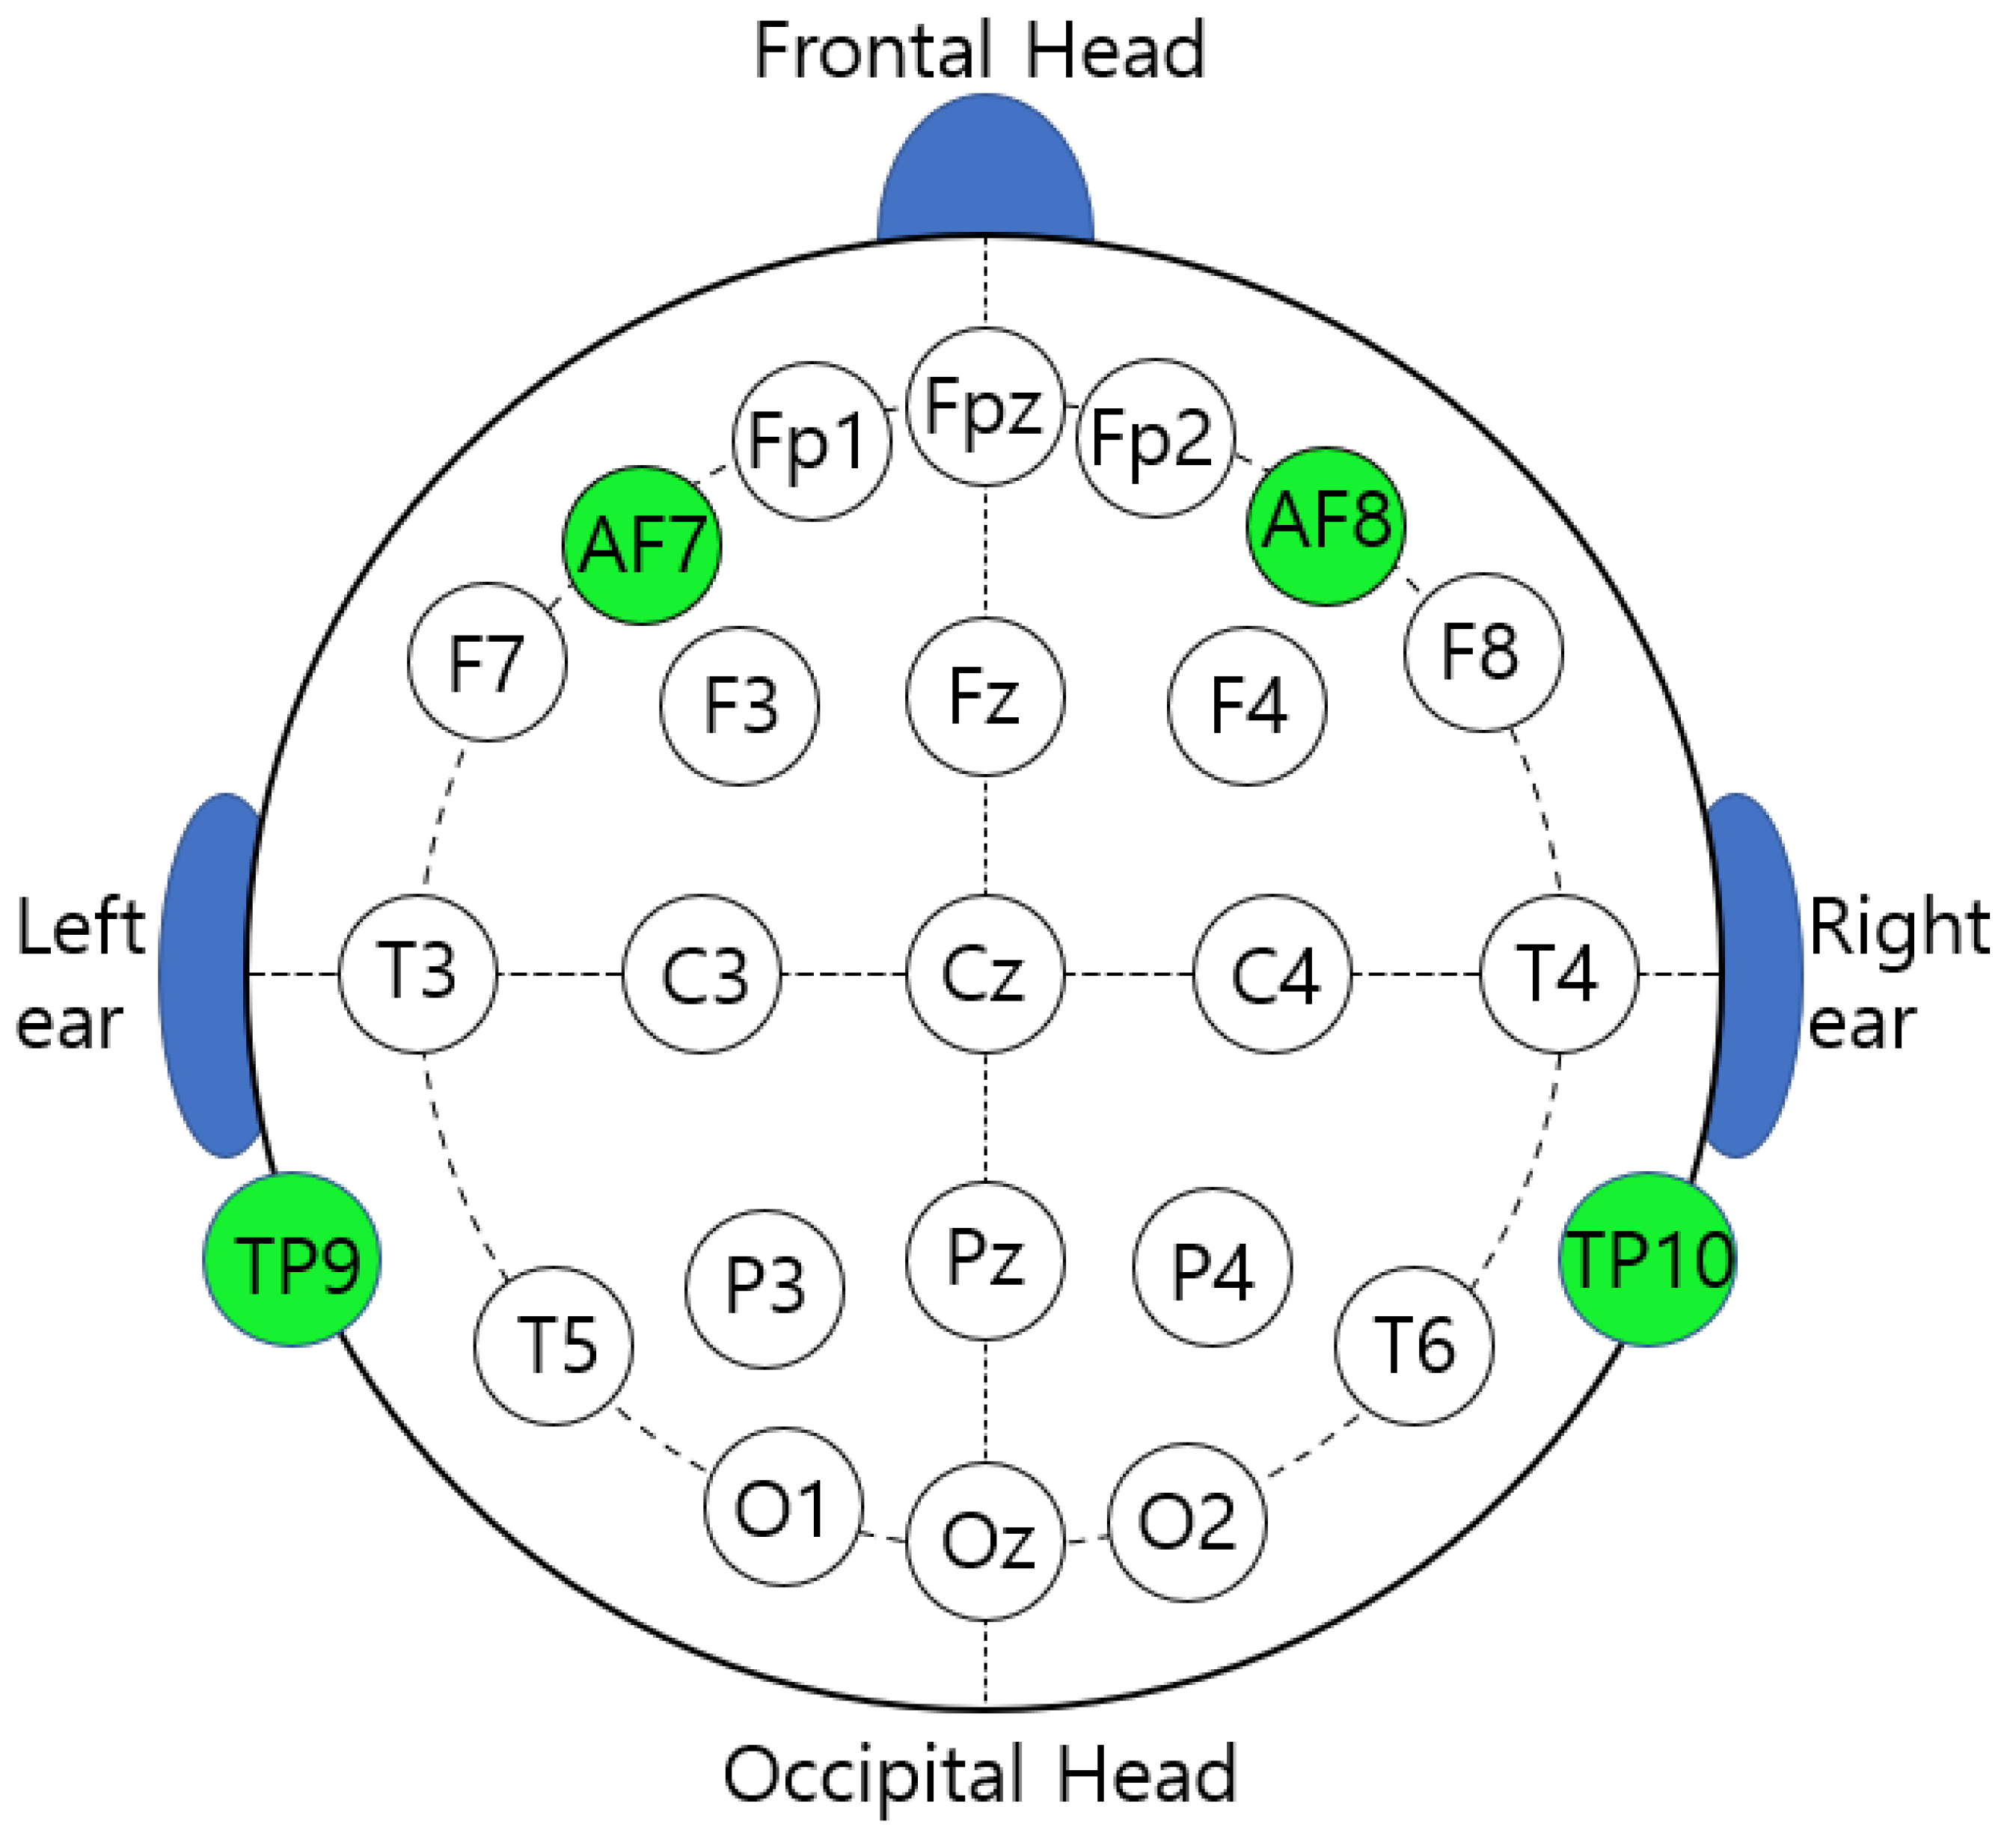

In [5]:
# Загрузка изображения
image_path = '/content/drive/MyDrive/MlOps_2_4/Images/eeg-electrodes.png'
from IPython.display import Image
Image(image_path, width=600, height=500)

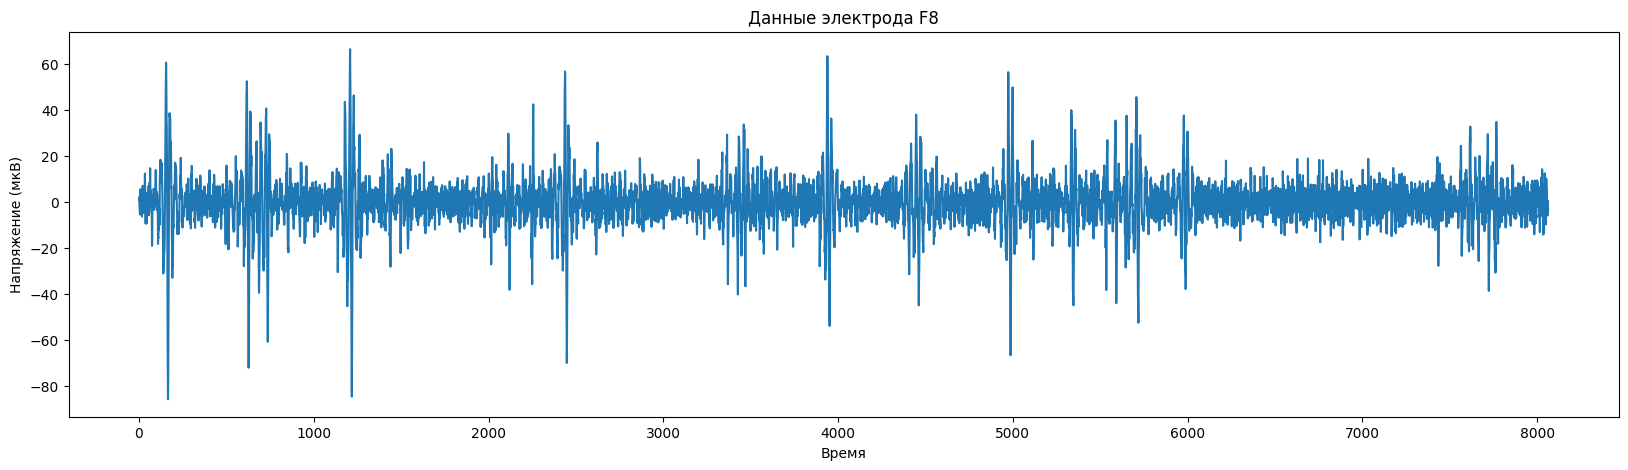

In [ ]:
# Визуализация данных с электрода F8
plt.figure(figsize=(20, 5))  # Задание размера графика
plt.plot(raw_eeg_data['F8'])  # Построение графика
plt.title('Данные электрода F8')  # Название графика
plt.ylabel('Напряжение (мкВ)')  # Подпись оси Y
plt.xlabel('Время')  # Подпись оси X
plt.show()  # Отображение графика

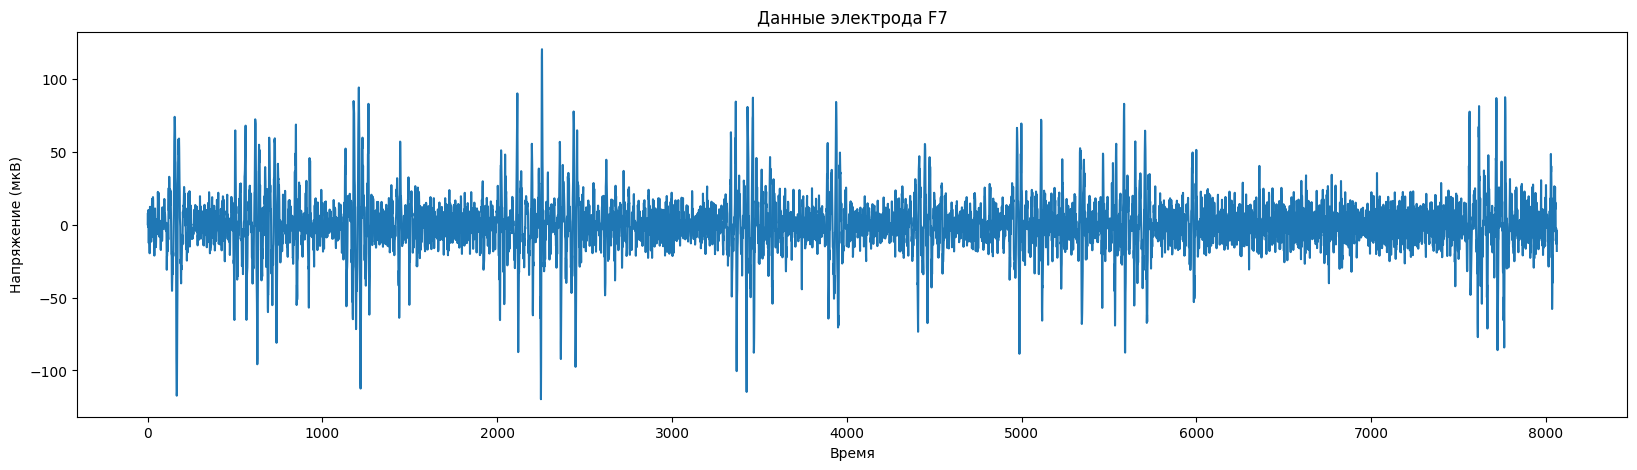

In [ ]:
# Визуализация данных с электрода F7
plt.figure(figsize=(20, 5))
plt.plot(raw_eeg_data['F7'])
plt.title('Данные электрода F7')
plt.ylabel('Напряжение (мкВ)')
plt.xlabel('Время')
plt.show()

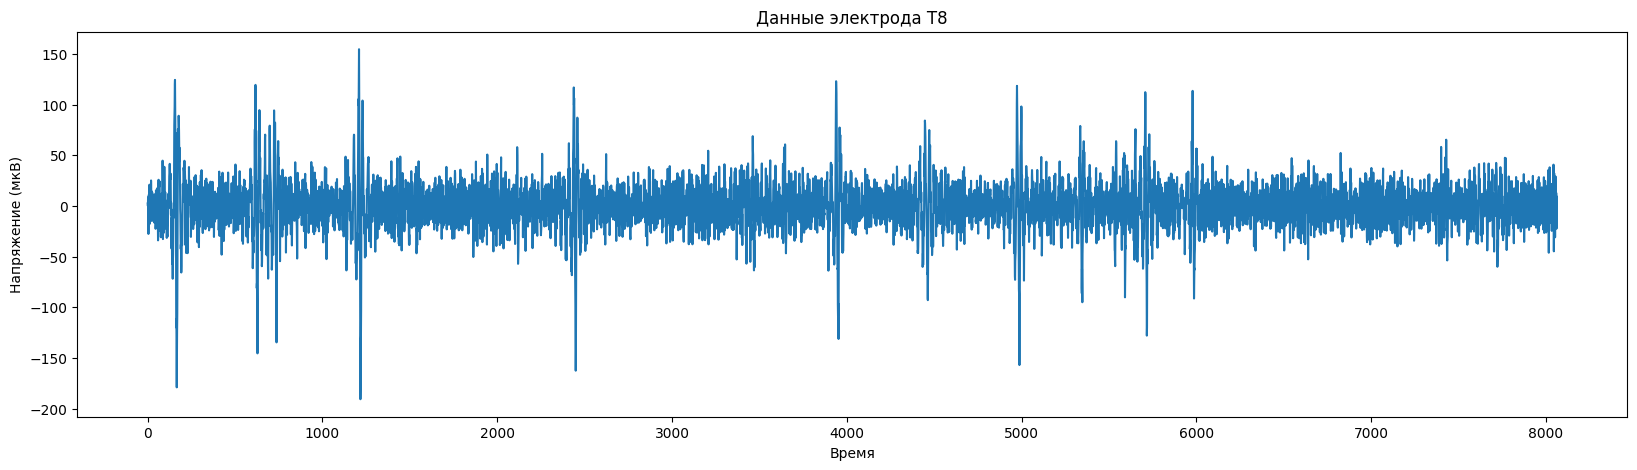

In [10]:
# Визуализация данных с электрода T8
plt.figure(figsize=(20, 5))
plt.plot(raw_eeg_data['T8'])
plt.title('Данные электрода T8')
plt.ylabel('Напряжение (мкВ)')
plt.xlabel('Время')
plt.show()

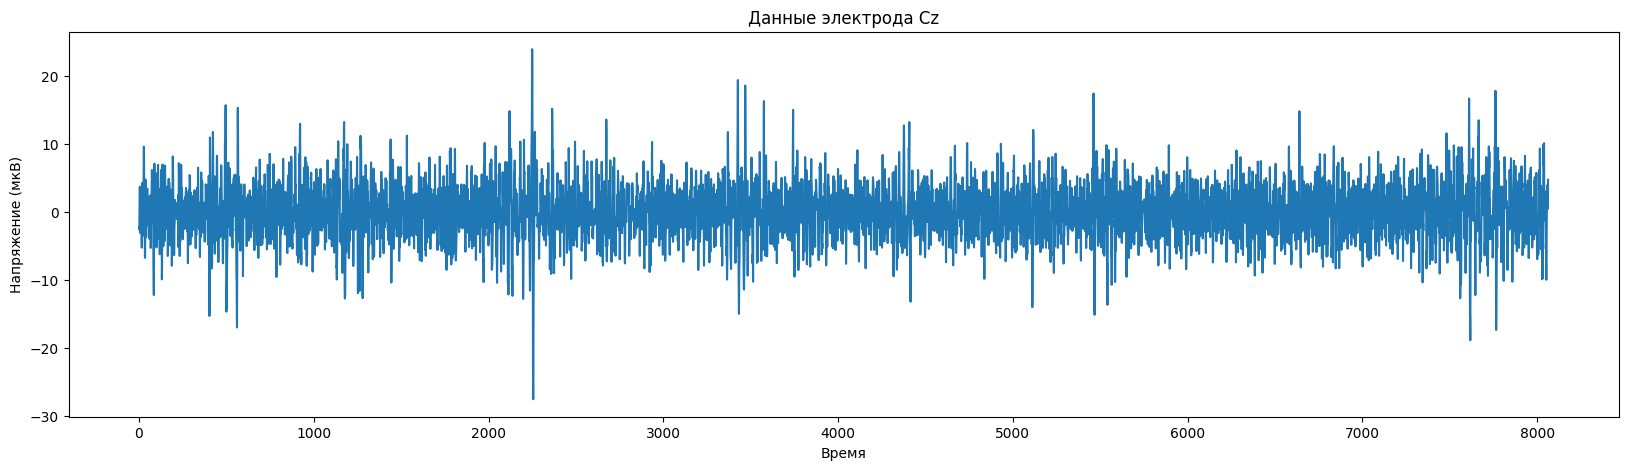

In [ ]:
# Визуализация данных с электрода Cz
plt.figure(figsize=(20, 5))
plt.plot(raw_eeg_data['Cz'])
plt.title('Данные электрода Cz')
plt.ylabel('Напряжение (мкВ)')
plt.xlabel('Время')
plt.show()

Набор обработанных данных ЭЭГ, содержащий признаки и метки эмоций.

In [14]:
# Загрузка и отображение данных об эмоциях, полученных из EEG
eeg_emotions_data = pd.read_csv('/content/drive/MyDrive/MlOps_2_4/Data/emotions.csv')
eeg_emotions_data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


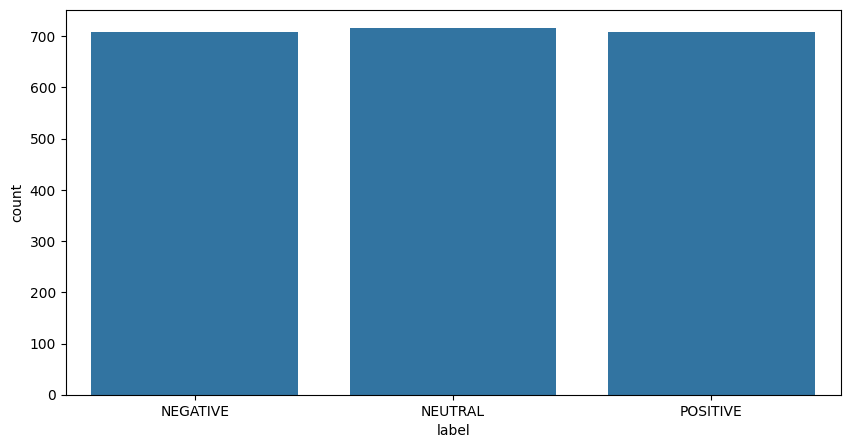

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64


In [ ]:
# Визуализация распределения меток эмоций в данных EEG
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=eeg_emotions_data)  # Использование seaborn для построения графика распределения
plt.show()  # Отображение графика

# Вывод количества каждой метки эмоции в данных
print(eeg_emotions_data['label'].value_counts())

У нас есть три класса, представляющие эмоции участников: Положительные эмоции, Нейтральные эмоции и Отрицательные эмоции. Количество классов почти равное, поэтому нам не нужно беспокоиться о дисбалансе классов.

## Предобработка данных

In [15]:
# Подготовка данных для модели машинного обучения

X = eeg_emotions_data.drop(['label'], axis=1)  # Удаление столбца 'label' для создания матрицы признаков
y = eeg_emotions_data['label']  # Извлечение столбца 'label' для создания вектора целевых переменных

In [16]:
# Кодирование категориальных данных
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_emotions = LabelEncoder()  # Создание экземпляра кодировщика меток
y = labelencoder_emotions.fit_transform(y)  # Преобразование меток в числовые значения

In [17]:
# Стандартизация признаков в наборе данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # Создание экземпляра стандартизатора

X = scaler.fit_transform(X)  # Применение стандартизации к матрице признаков

In [18]:
# Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Разделение данных с тестовым набором размером 20% и фиксированным random_state для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2003)

## Создание моделей

Общая функция для оценки моделей:

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_model(y_test, y_pred):
    # Функция для оценки модели
    # Построение матрицы ошибок
    conf = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(conf, index=[i for i in ["Положительно", "Нейтрально", "Отрицательно"]],
                         columns=[i for i in ["Положительно", "Нейтрально", "Отрицательно"]])
    plt.figure(figsize=(10,7))
    s = sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='g')
    s.set(xlabel='Предсказанная метка', ylabel='Истинная метка', title="Матрица ошибок")
    s.xaxis.labelpad = 20
    s.yaxis.labelpad = 20

    # Вывод отчета о классификации
    print(classification_report(y_test, y_pred))

Логистическая регрессия:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       147
           1       0.99      0.98      0.99       129
           2       0.97      0.95      0.96       151

    accuracy                           0.97       427
   macro avg       0.98      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427



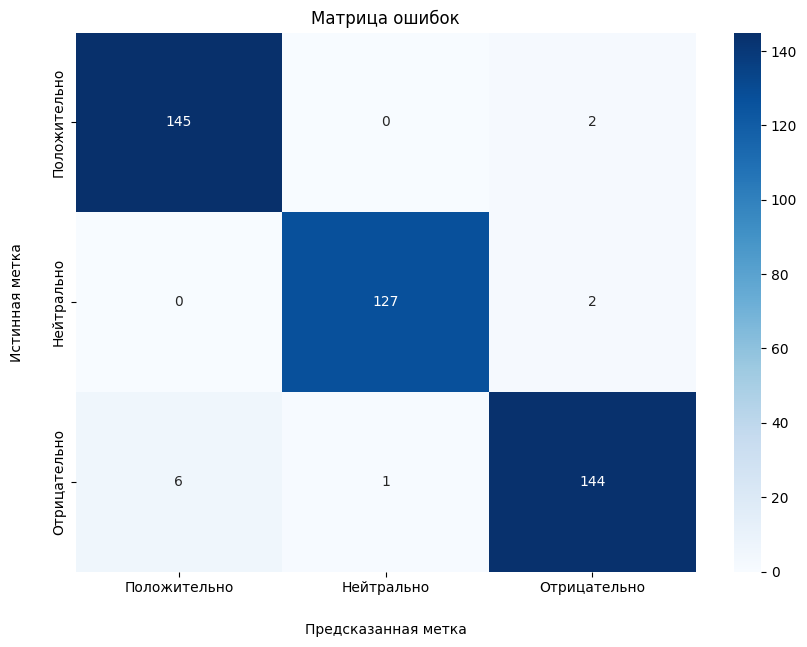

In [20]:
from sklearn.linear_model import LogisticRegression
import pickle

# Создание модели логистической регрессии
model = LogisticRegression(random_state=2003, multi_class='multinomial', max_iter=1000)

# Обучение модели
model.fit(X_train, y_train)

# Оценка модели
evaluate_model(y_test, model.predict(X_test))

# Сохранение модели
pickle.dump(model, open('/content/drive/MyDrive/MlOps_2_4/Models/linear-model.pkl','wb'))

Метод опорных векторов (SVM):

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       147
           1       0.98      0.98      0.98       129
           2       0.96      0.95      0.95       151

    accuracy                           0.97       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427



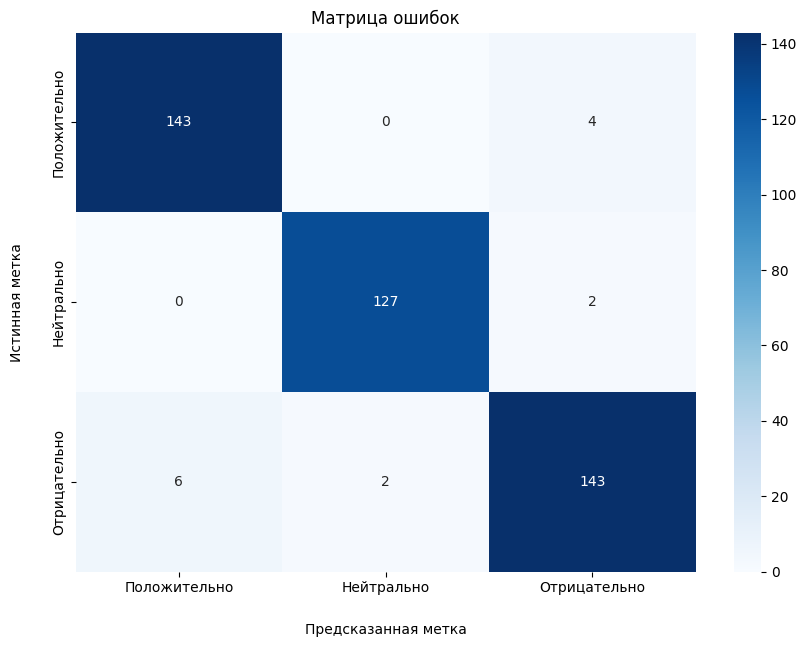

In [21]:
from sklearn.svm import SVC

# Создание модели метода опорных векторов
model = SVC(kernel='rbf', gamma='auto', C=1.0, random_state=2003)

# Обучение модели
model.fit(X_train, y_train)

# Оценка модели
evaluate_model(y_test, model.predict(X_test))

# Сохранение модели
pickle.dump(model, open('/content/drive/MyDrive/MlOps_2_4/Models/svm-model.pkl','wb'))

Случайный лес:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       147
           1       1.00      0.99      1.00       129
           2       0.98      0.99      0.98       151

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



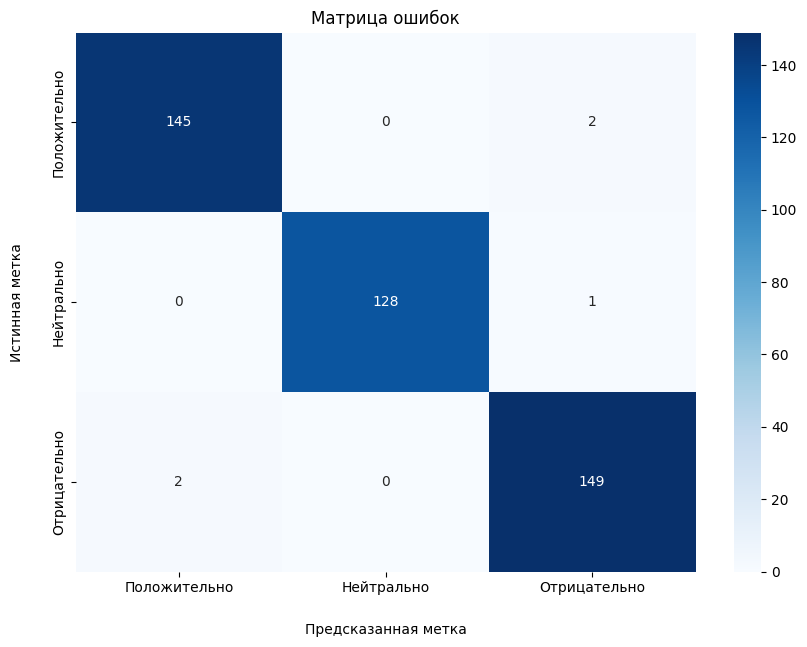

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Создание модели случайного леса
model = RandomForestClassifier(n_estimators=100, random_state=2003)

# Обучение модели
model.fit(X_train, y_train)

# Оценка модели
evaluate_model(y_test, model.predict(X_test))

# Сохранение модели
pickle.dump(model, open('/content/drive/MyDrive/MlOps_2_4/Models/randomforest-model.pkl','wb'))

Модель случайного леса является наиболее эффективной.


Весь процесс от загрузки данных до обучения и тестирования моделей был полностью автоматизирован с использованием Airflow, что позволяет повторять эксперименты с высокой степенью точности и минимальным вмешательством.

Скриншоты из Airflow демонстрируют успешное выполнение DAG, который включает в себя несколько задач: get_data, preprocess_data, train_test_split, linear_model_train_test, svm_model_train_test, и randomforest_model_train_test.


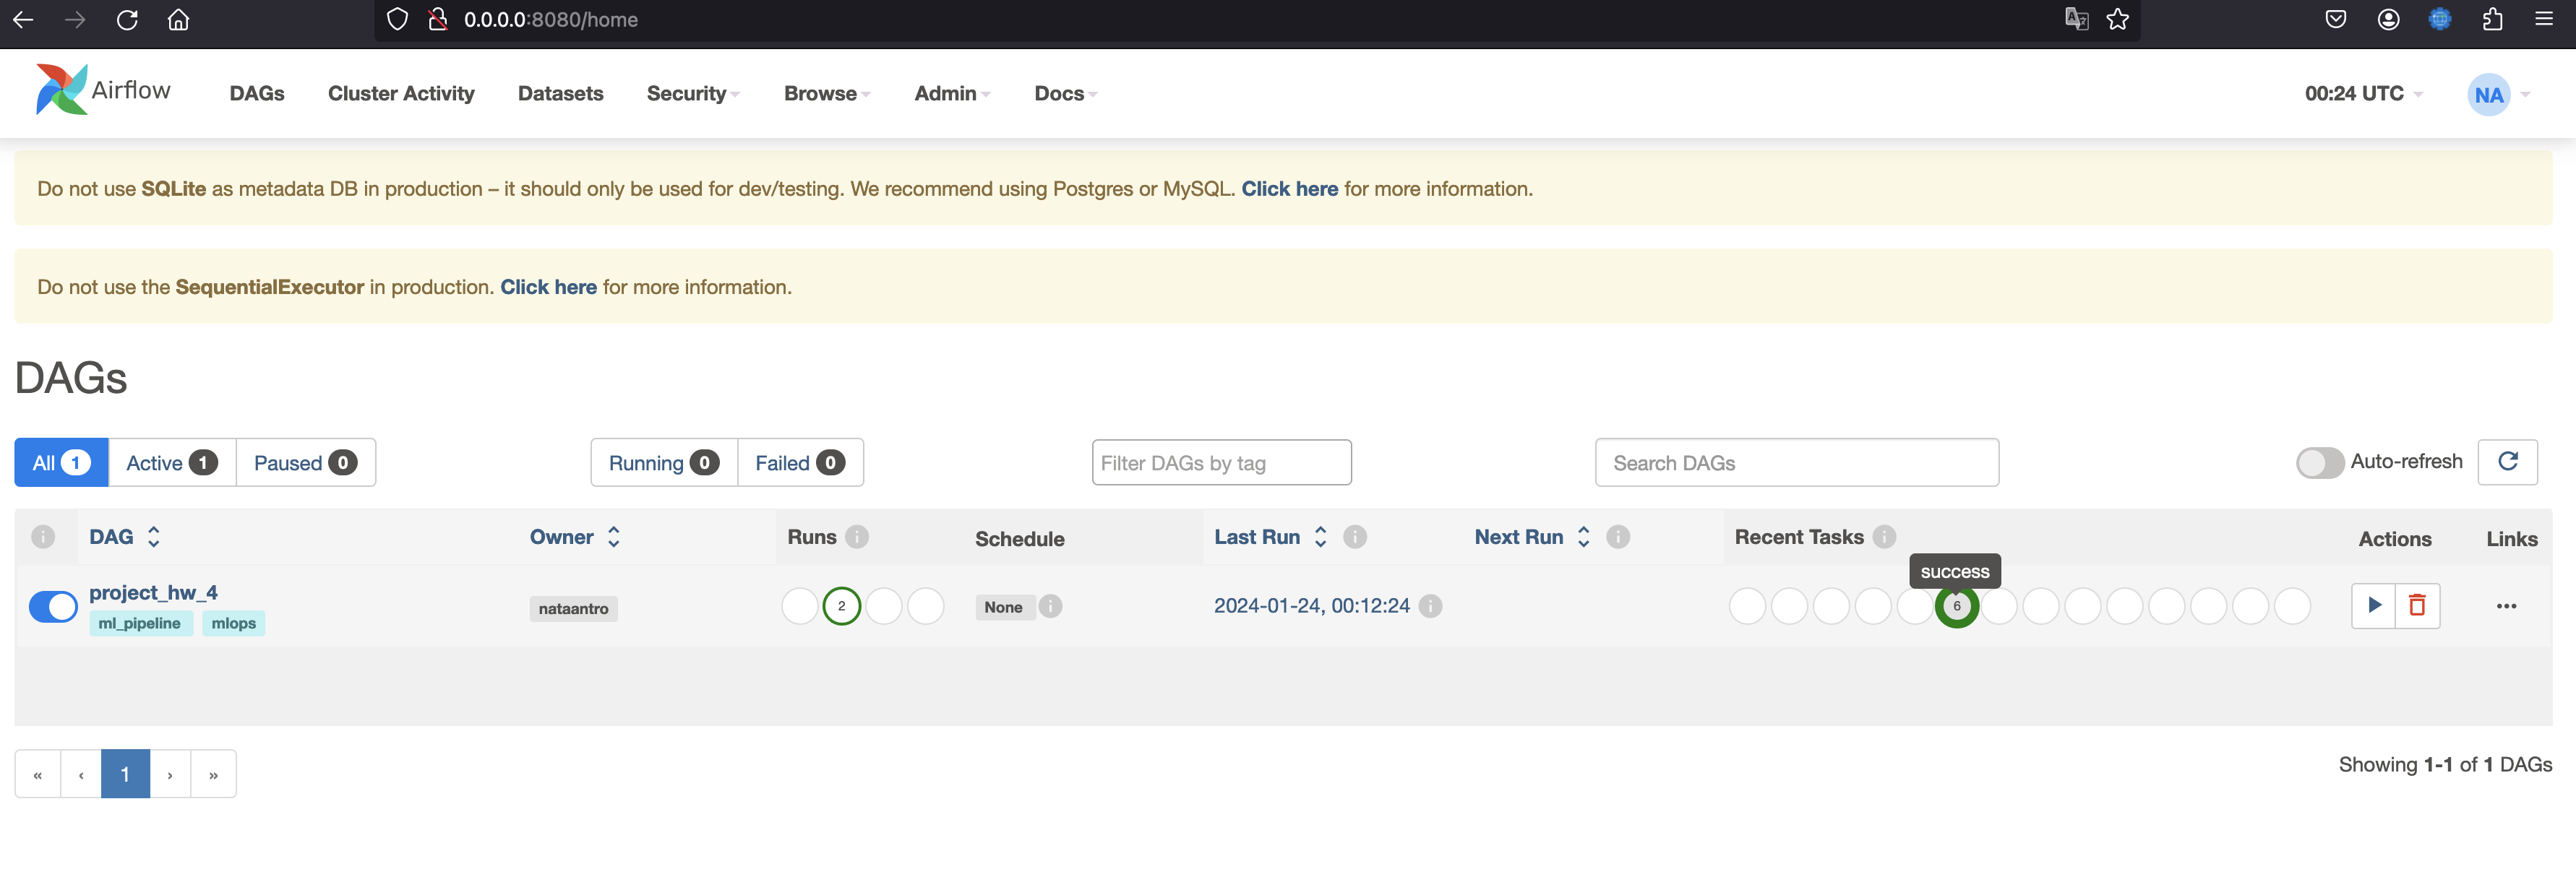

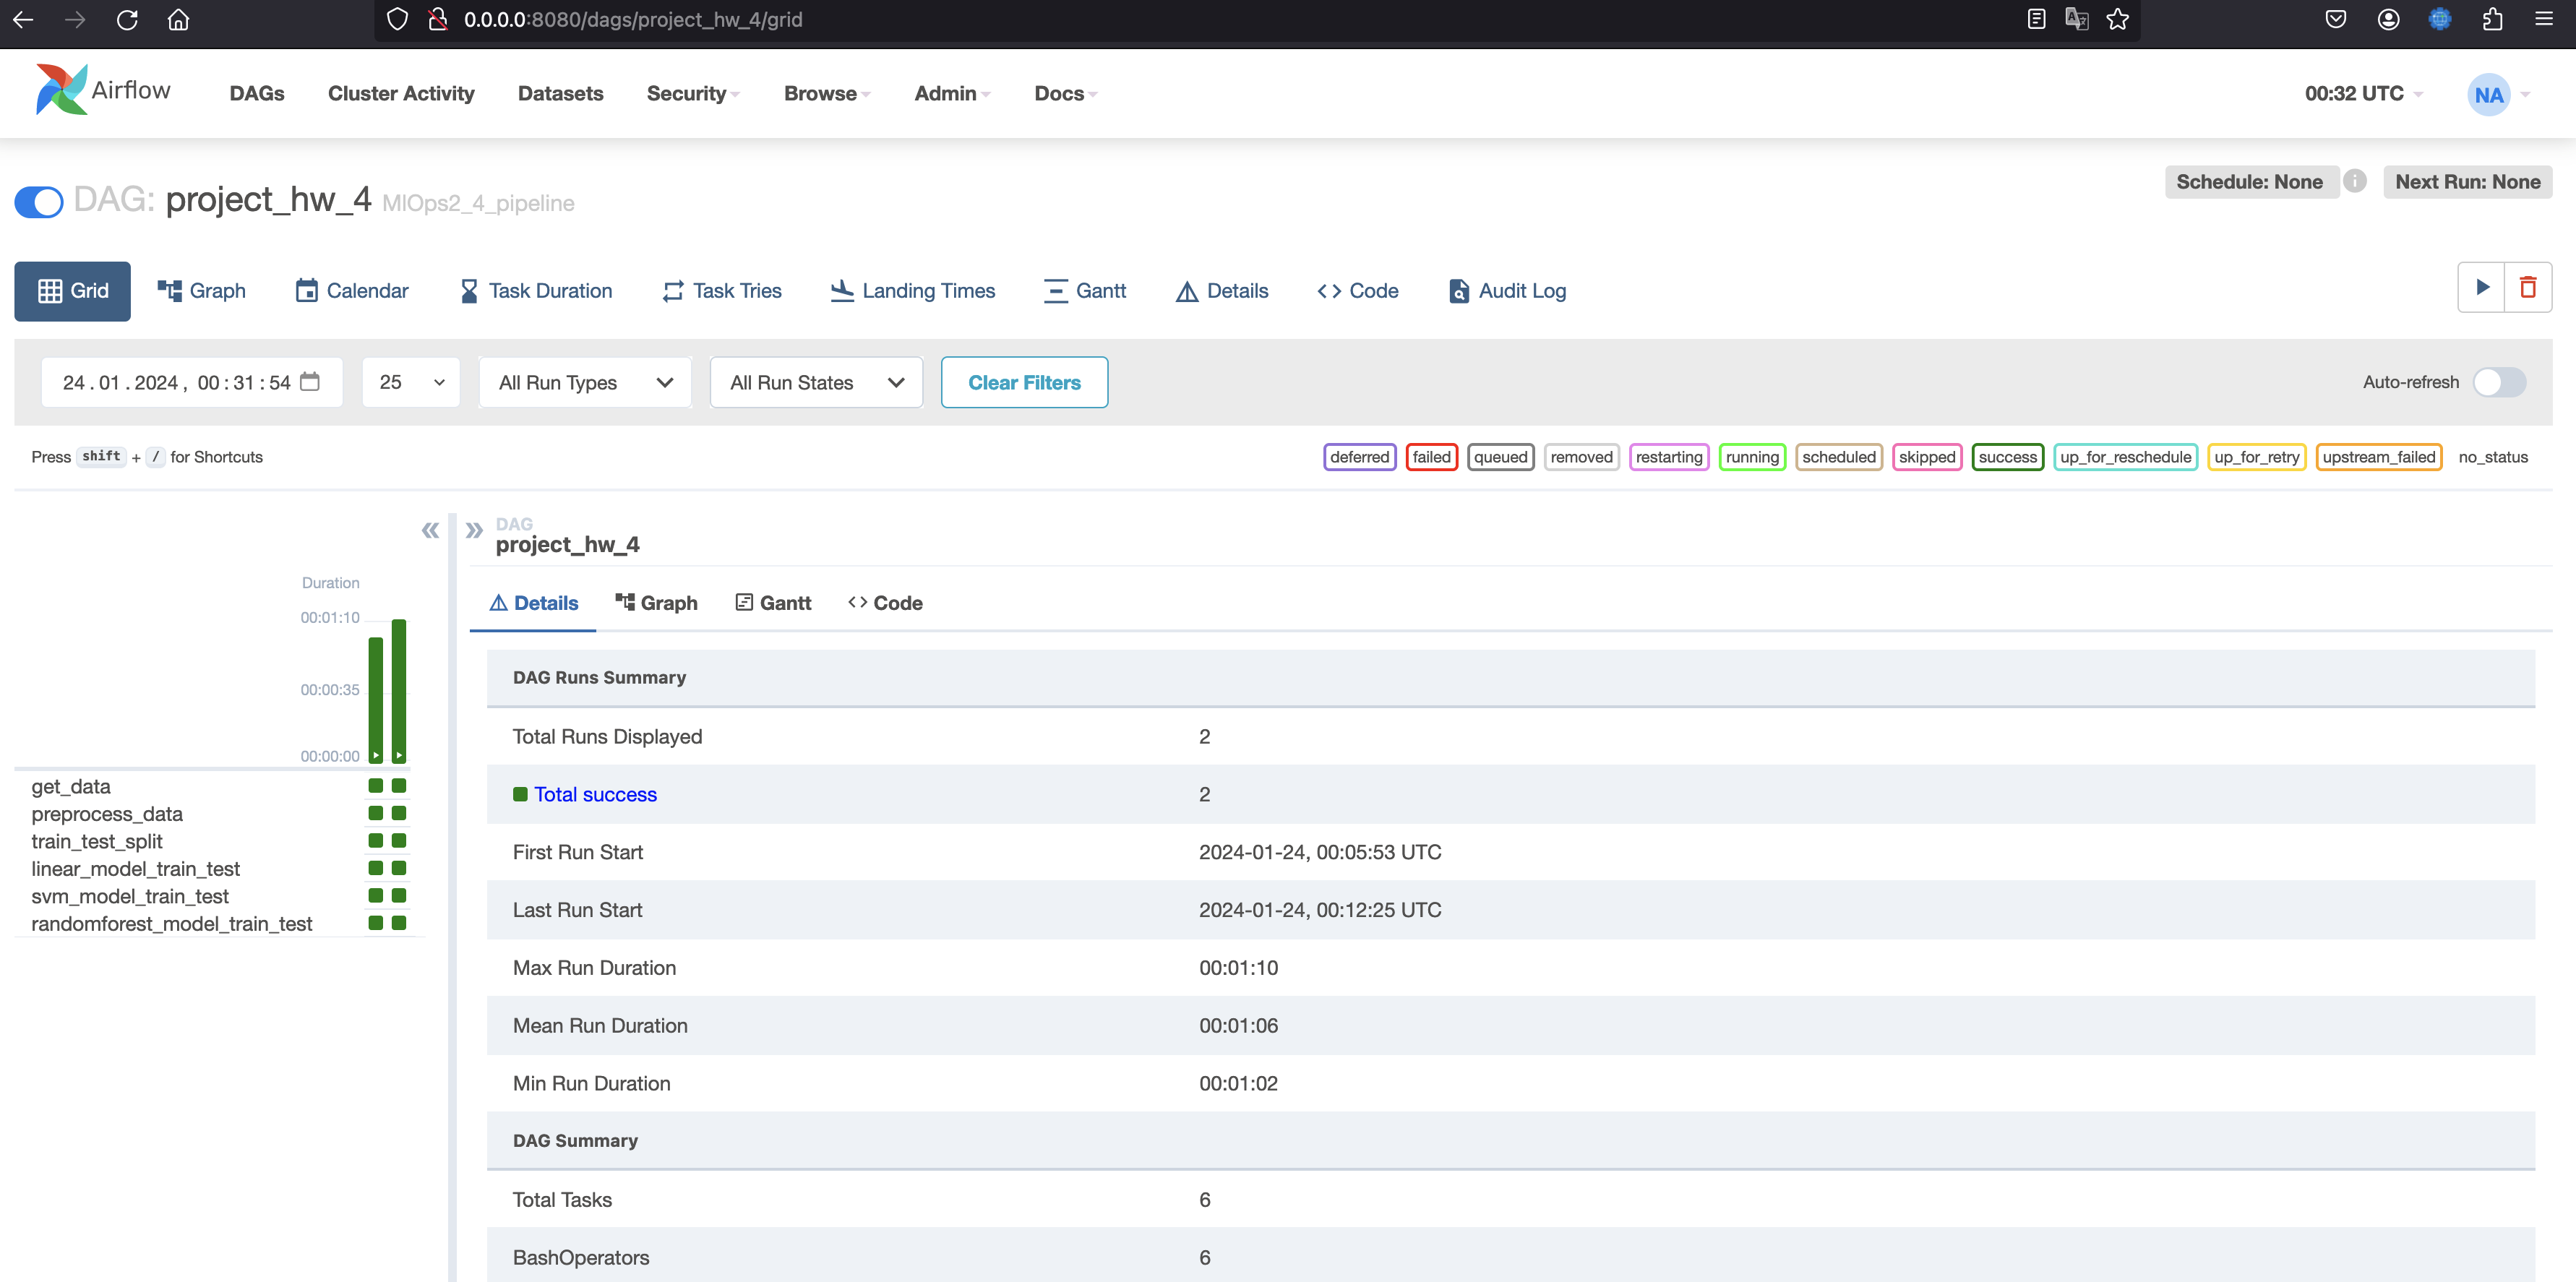

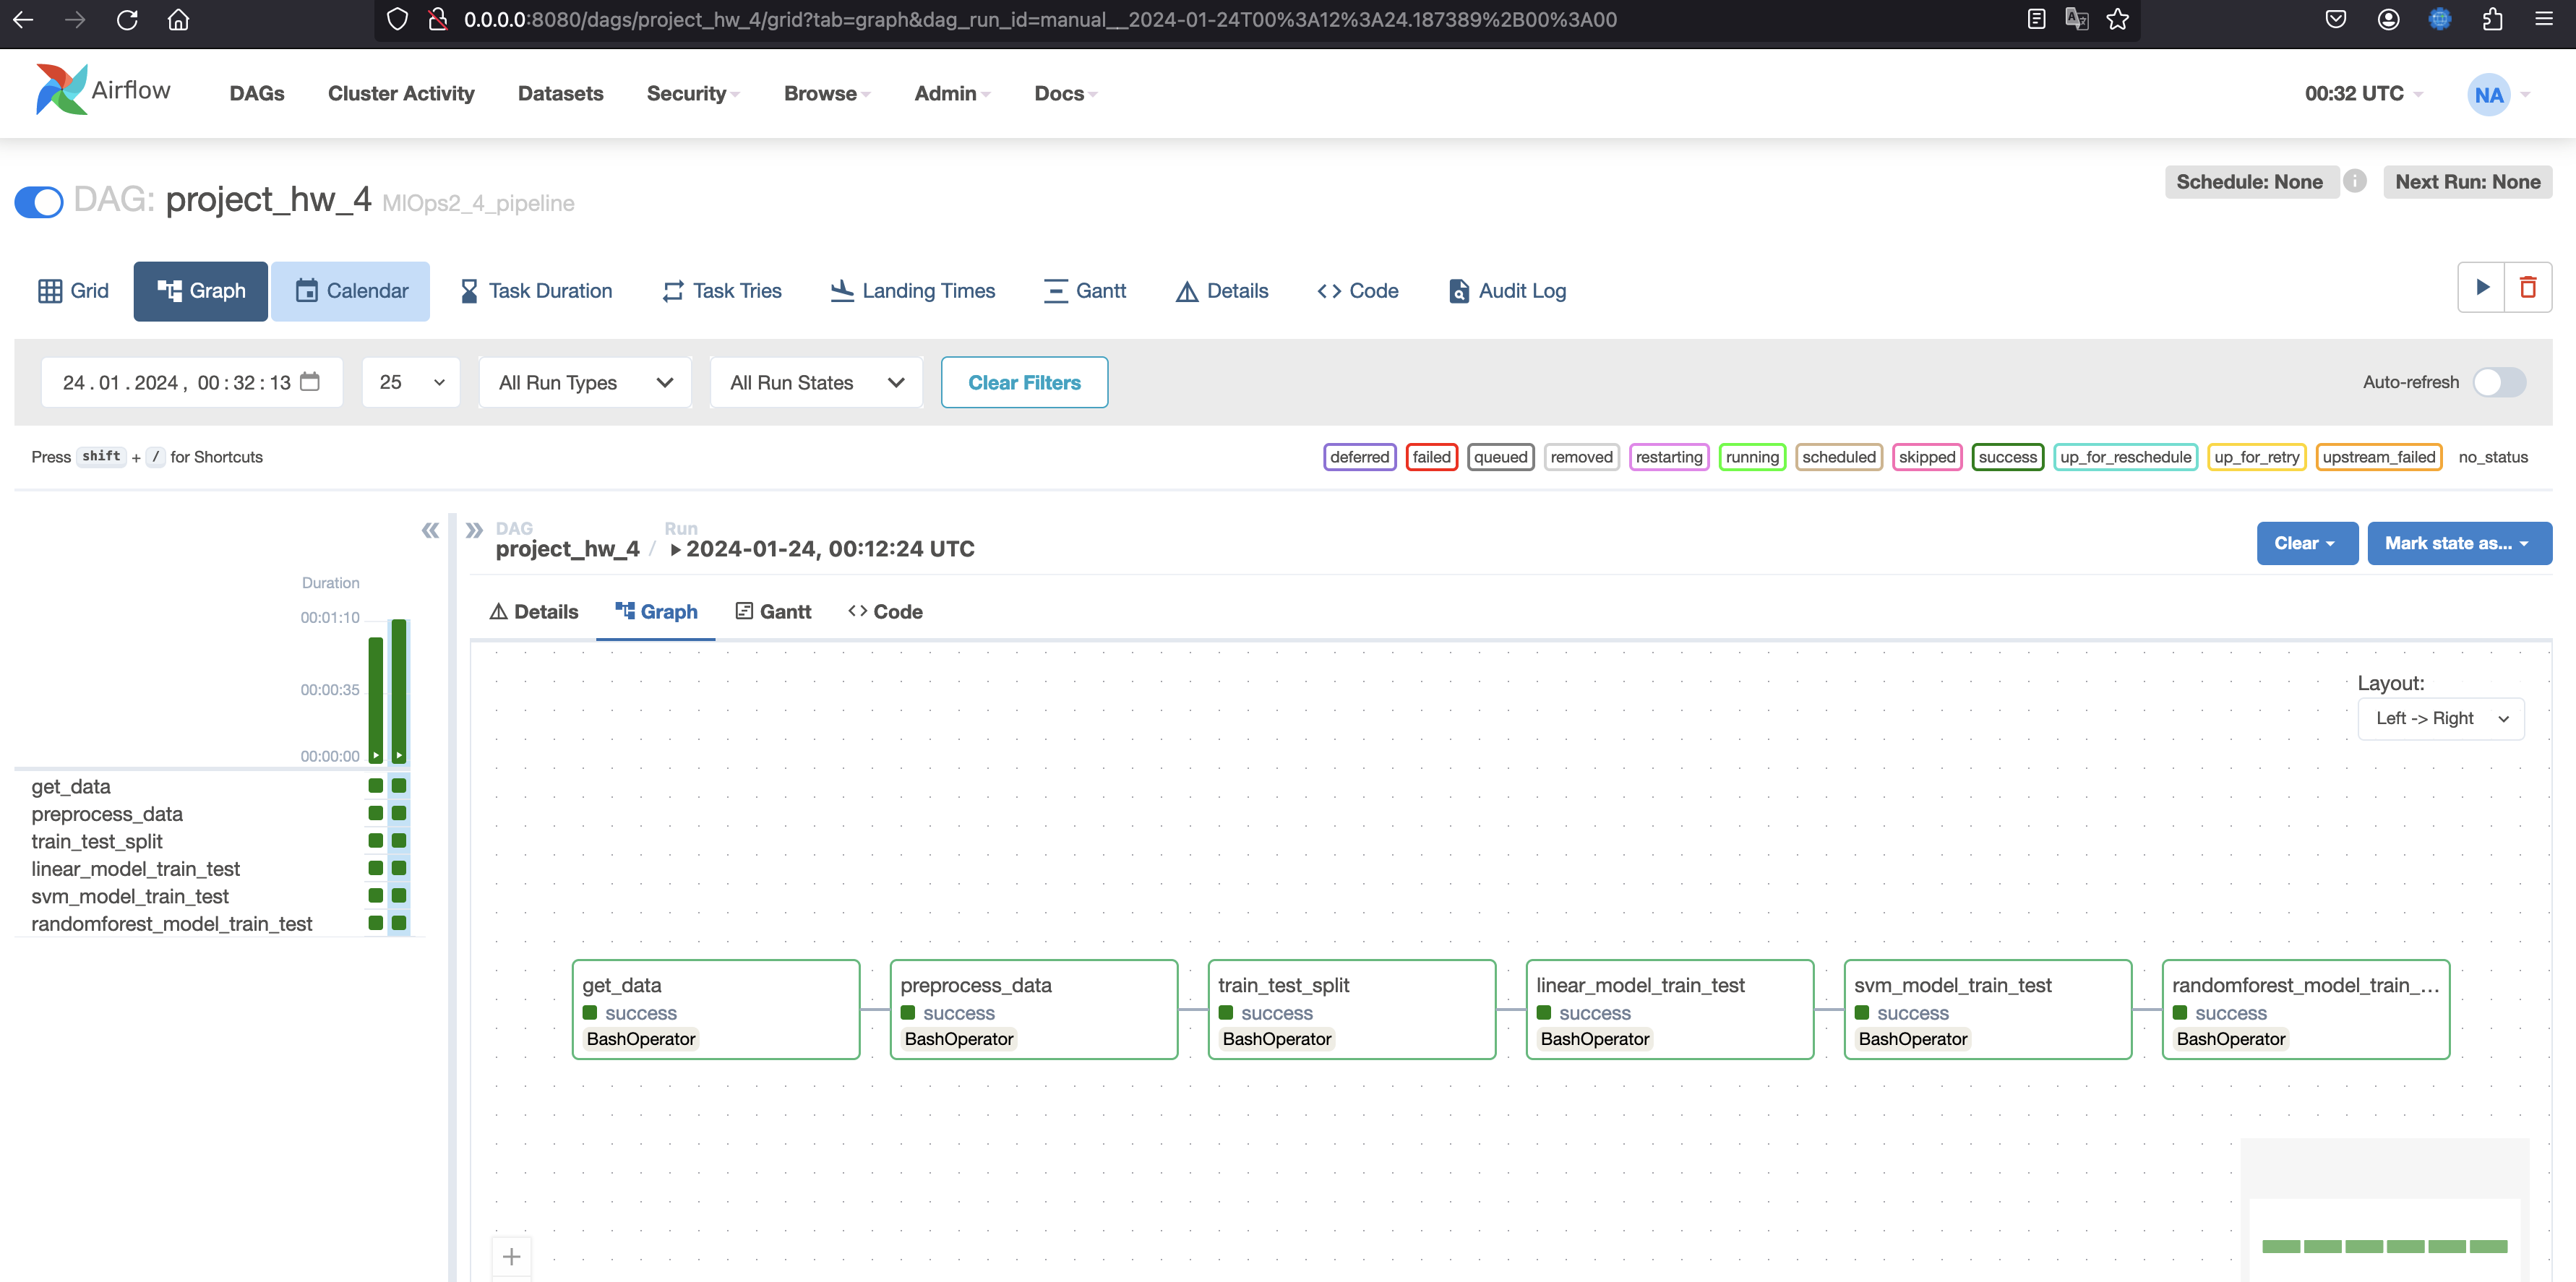

In [11]:
# Загрузка скриншотов
image_paths = ['/content/drive/MyDrive/MlOps_2_4/Images/airflow_home.png', '/content/drive/MyDrive/MlOps_2_4/Images/airflow_grid.png', '/content/drive/MyDrive/MlOps_2_4/Images/airflow_graph.png']

for image_path in image_paths:
    display(Image(image_path))


Процесс отслеживается и документируется с помощью MLflow, обеспечивая возможность детального анализа каждого этапа процесса, включая параметры модели и их метрики.

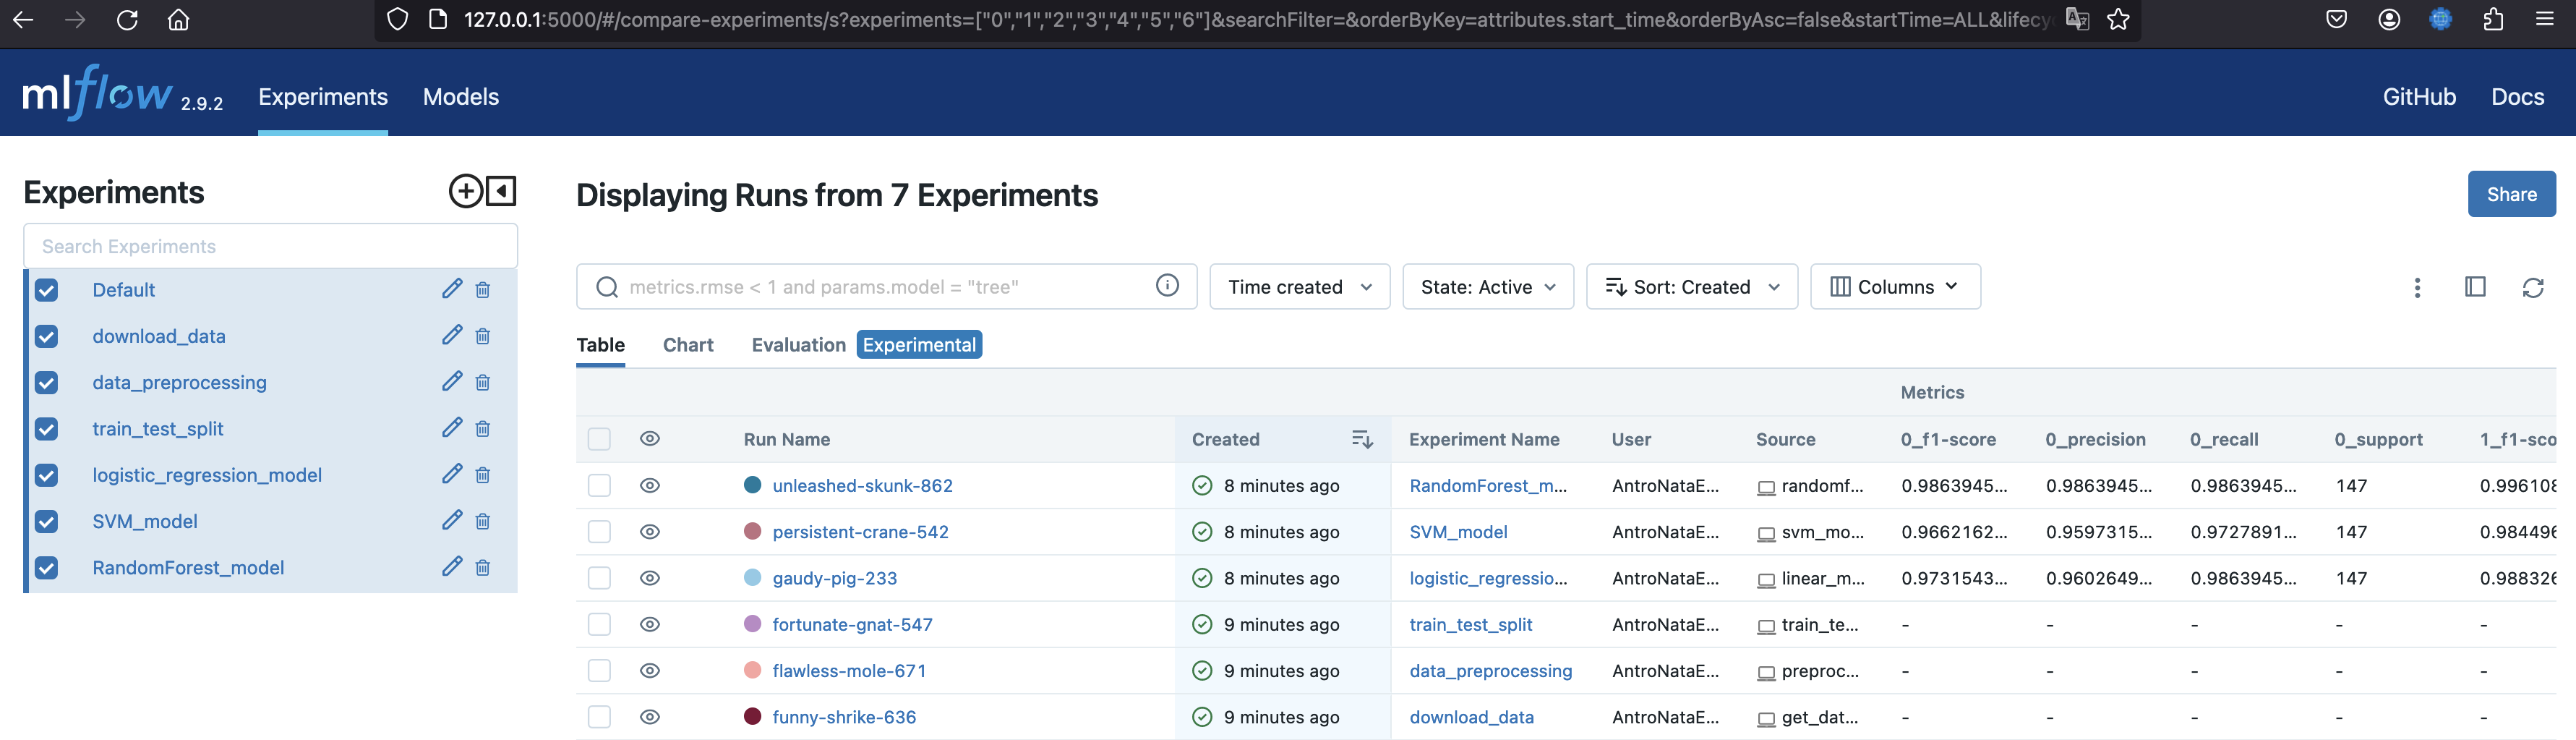

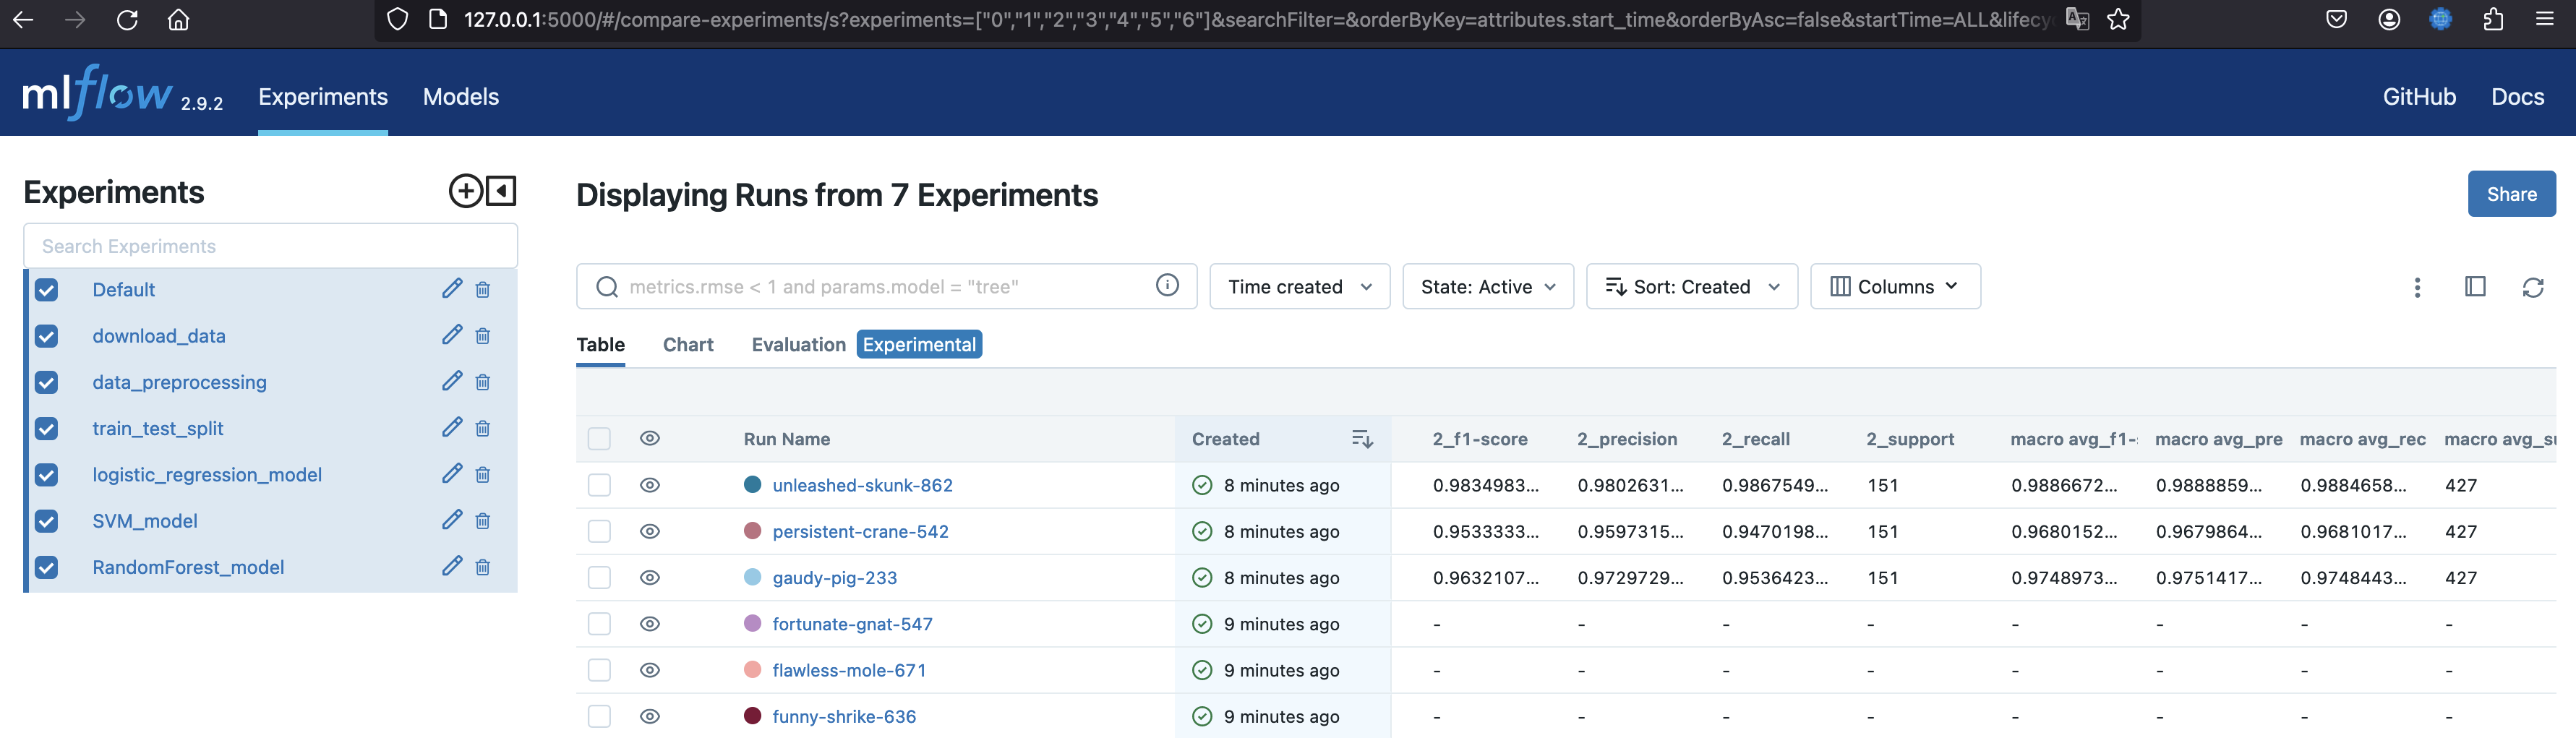

In [13]:
# Загрузка скриншотов
image_paths = ['/content/drive/MyDrive/MlOps_2_4/Images/mlflow_metrics1.png', '/content/drive/MyDrive/MlOps_2_4/Images/mlflow_metrics2.png']

for image_path in image_paths:
    display(Image(image_path))

Модель случайного леса показала наивысшие значения метрик для всех классов, что указывает на ее способность предоставлять сбалансированные и точные предсказания для различных классов. <br>
Можно сделать вывод, что случайный лес является наиболее предпочтительной моделью для задачи классификации с использованием набора данных электроэнцефалографии головного мозга.